# 1 - Load Modules

In [1]:
# Python libs
import string
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=FutureWarning)
from collections import Counter
import math

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data Science
import pandas as pd
import numpy as np

# Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler,RobustScaler, MinMaxScaler,  Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectPercentile, VarianceThreshold, SelectFromModel, RFE
from sklearn.model_selection import GridSearchCV
from sklearn.utils import class_weight
from sklearn import model_selection
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.multiclass import OneVsRestClassifier

# 2 - Load Dataset

In [2]:
df = pd.read_csv(r'C:\Users\Firas H\Downloads\Kickstarter\kickstarter-projects\ks-projects-201801.csv')

# 3 - Dataset Exploration

## 3.1 - Data Analysis

In [4]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [5]:
df[df['backers']>50].head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,successful,224,US,52375.00,52375.00,50000.00
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.0,canceled,58,US,8233.00,8233.00,125000.00
11,100005484,Lisa Lim New CD!,Indie Rock,Music,USD,2013-04-08,12500.0,2013-03-09 06:42:58,12700.0,successful,100,US,12700.00,12700.00,12500.00
14,1000057089,Tombstone: Old West tabletop game and miniatur...,Tabletop Games,Games,GBP,2017-05-03,5000.0,2017-04-05 19:44:18,94175.0,successful,761,GB,57763.78,121857.33,6469.73
20,1000072011,CMUK. Shoes: Take on Life Feet First.,Fashion,Fashion,USD,2013-12-30,20000.0,2013-11-25 07:06:11,34268.0,successful,624,US,34268.00,34268.00,20000.00


In [6]:
df[df['goal']>100000].head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.0,canceled,58,US,8233.0,8233.0,125000.0
13,1000056157,G-Spot Place for Gamers to connect with eachot...,Games,Games,USD,2016-03-25,200000.0,2016-02-09 23:01:12,0.0,failed,0,US,0.0,0.0,200000.0
60,1000233415,Teachers In The Sky,Documentary,Film & Video,USD,2016-06-18,250000.0,2016-04-19 23:53:22,65.0,failed,2,US,65.0,65.0,250000.0
121,1000514796,CASE:Lynk - Your EMERGENCY iPhone Charge & Syn...,Product Design,Design,USD,2012-10-11,125000.0,2012-09-06 06:59:37,3012.0,failed,67,US,3012.0,3012.0,125000.0
127,1000535116,Xi3: Help us Usher in the Post-PC Era,Technology,Technology,USD,2012-10-28,250000.0,2012-09-28 09:33:59,90771.0,failed,120,US,90771.0,90771.0,250000.0


In [7]:
df[(df['pledged']>2000)&(df['usd pledged']>2000)&(df['usd_pledged_real']>2000)].head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00
11,100005484,Lisa Lim New CD!,Indie Rock,Music,USD,2013-04-08,12500.0,2013-03-09 06:42:58,12700.00,successful,100,US,12700.00,12700.00,12500.00
14,1000057089,Tombstone: Old West tabletop game and miniatur...,Tabletop Games,Games,GBP,2017-05-03,5000.0,2017-04-05 19:44:18,94175.00,successful,761,GB,57763.78,121857.33,6469.73


In [8]:
df[(df['goal'] <= 100000) & (df['goal'] >= 1000)].head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


## 3.2 -  Dataset Description

In [9]:
df.describe()
print("Data shape {}".format(df.shape),end="\n\n")
print("=======================================================")
print("Dataset Information :")
print("=======================================================\n")
print(df.info(),end="\n\n")
print("=======================================================")
print("Dataset Unique elements :")
print("=======================================================\n")
print(df.nunique())


Data shape (378661, 15)

Dataset Information :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB
None

Dataset Unique elements :

ID                  378661
name                375764
category               159
main_category   

## 3.3 -  Descriptive Statistics

State Percentual in %: 

failed        52.22
successful    35.38
canceled      10.24
undefined      0.94
live           0.74
suspended      0.49
Name: state, dtype: float64


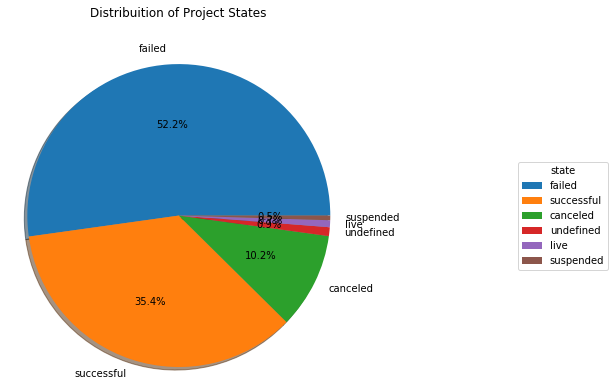

In [10]:
percentual_success = round(df["state"].value_counts() / len(df["state"]) * 100,2)

print("=======================================================")
print("State Percentual in %: ")
print("=======================================================\n")
print(percentual_success)

state = round(df["state"].value_counts() / len(df["state"]) * 100,2)

labels = list(state.index)
values = list(state.values)

fig1, ax1 = plt.subplots()
plt.title('Distribuition of Project States\n\n')
wedges, texts, autotexts = ax1.pie(values, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
ax1.legend(wedges, labels,
          title="state",
          loc="center left",
          bbox_to_anchor=(1.5, 0, 0.5, 1))
fig1.set_size_inches(6,6)
plt.show()

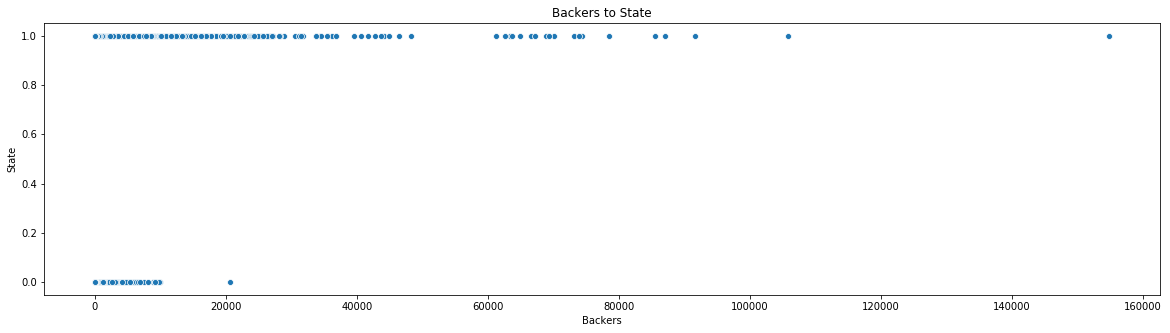

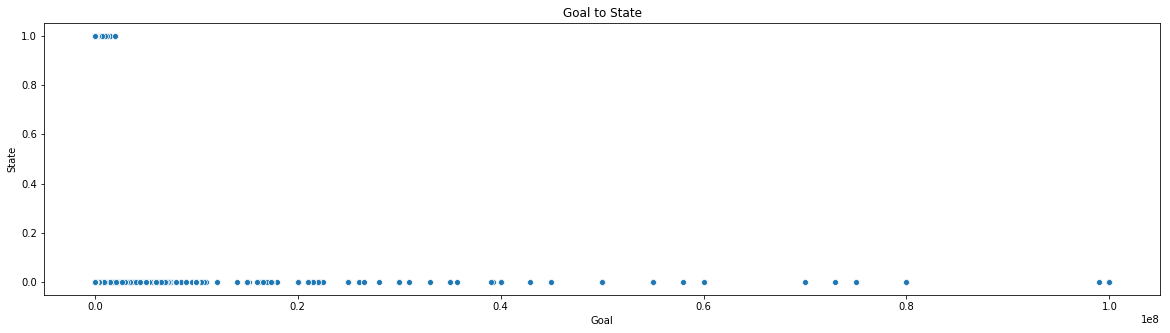

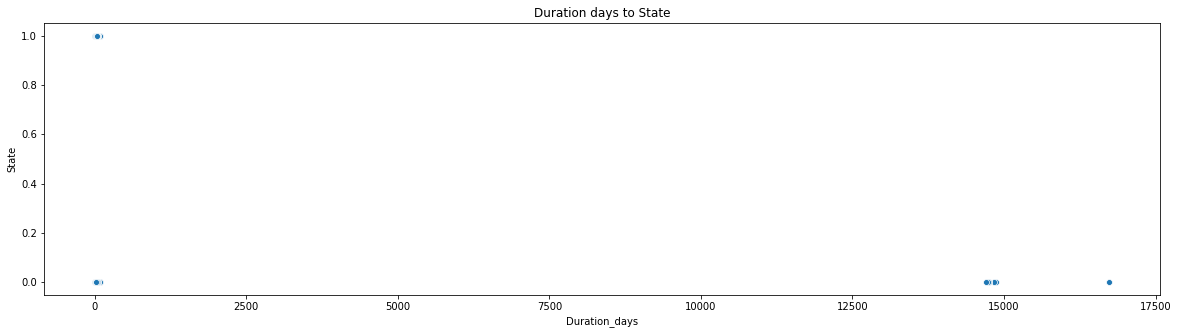

In [11]:
df2 = df[(df['backers'] <= 200000)].copy()

x = [val for val in df2['backers'].values]
y = df2['state'].map({
        'failed': 0,
        'canceled': 0, 
        'suspended':0, 
        'successful': 1       
})

data = pd.DataFrame({'Backers':x, 'State':y})

plt.figure(figsize=(20,5))
ax = sns.scatterplot(x="Backers", y="State", data=data)
ax.set_title('Backers to State')
plt.show()

y = df['state'].map({
        'failed': 0,
        'canceled': 0, 
        'suspended':0, 
        'successful': 1       
})
x = [val for val in df['goal'].values]
data = pd.DataFrame({'Goal':x, 'State':y})

plt.figure(figsize=(20,5))
ax = sns.scatterplot(x="Goal", y="State", data=data)
ax.set_title('Goal to State')
plt.show()

df3=df
df3['launched'] = pd.to_datetime(df3['launched'])
df3['deadline'] = pd.to_datetime(df3['deadline'])
df3['duration_days'] = df3['deadline'].subtract(df3['launched'])
df3['duration_days'] = df3['duration_days'].astype('timedelta64[D]')

x = [val for val in df3['duration_days'].values]
data = pd.DataFrame({'Duration_days':x, 'State':y})

plt.figure(figsize=(20,5))
ax = sns.scatterplot(x="Duration_days", y="State", data=data)
ax.set_title('Duration days to State')
plt.show()

## 3.4 - Data Exploration and Analysis

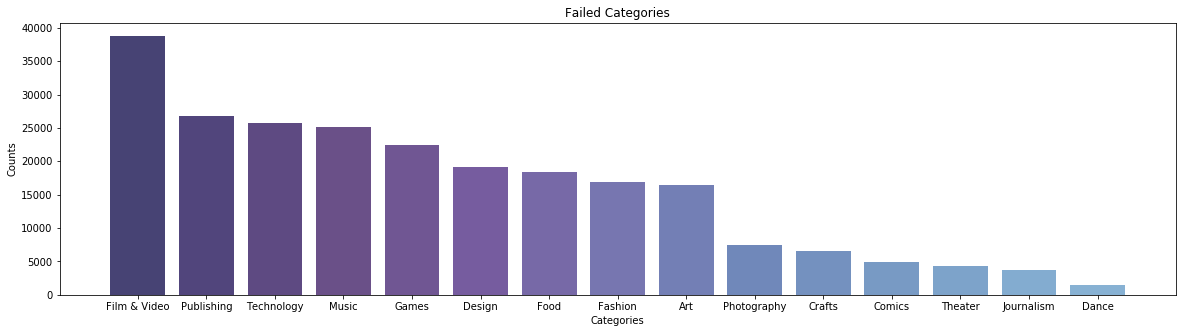

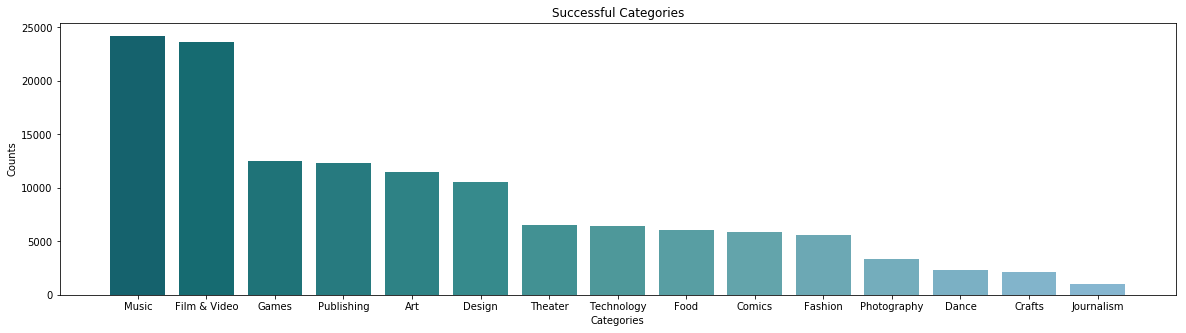

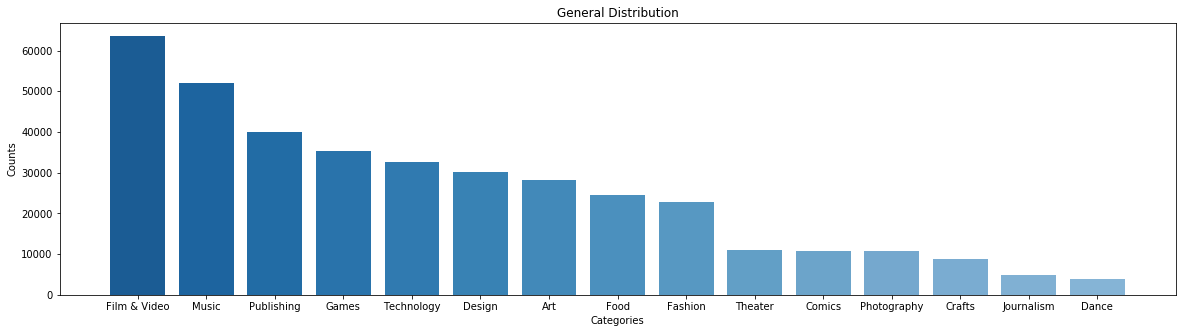

In [12]:
main_cats = df["main_category"].value_counts()
main_cats_failed = df[df["state"].isin(["failed","canceled","suspended"])]["main_category"].value_counts()
main_cats_sucess = df[df["state"] == "successful"]["main_category"].value_counts()


x= [ind for ind in main_cats_failed.index]
y= [val for val in main_cats_failed.values]
data = pd.DataFrame({'Categories':x, 'Counts':y})

plt.figure(figsize=(20,5))
ax = sns.barplot(x="Categories", y="Counts", data=data, palette="PuRd_r")
ax.set_title('Failed Categories')
plt.bar(np.arange(len(main_cats)), main_cats_failed.values, align='center', alpha=0.5)
plt.xticks(np.arange(len(main_cats)), main_cats_failed.index)
plt.ylabel('Counts')
plt.show()


x= [ind for ind in main_cats_sucess.index]
y= [val for val in main_cats_sucess.values]
data = pd.DataFrame({'Categories':x, 'Counts':y})

plt.figure(figsize=(20,5))
ax = sns.barplot(x="Categories", y="Counts", data=data, palette="Greens_r")
ax.set_title('Successful Categories')
plt.bar(np.arange(len(main_cats)), main_cats_sucess.values, align='center', alpha=0.5)
plt.xticks(np.arange(len(main_cats)), main_cats_sucess.index)
plt.ylabel('Counts')
plt.show()


x= [ind for ind in main_cats.index]
y= [val for val in main_cats.values]
data = pd.DataFrame({'Categories':x, 'Counts':y})
plt.figure(figsize=(20,5))
ax = sns.barplot(x="Categories", y="Counts", data=data, palette="Blues_r")
ax.set_title('General Distribution')
plt.bar(np.arange(len(main_cats)), main_cats.values, align='center', alpha=0.5)
plt.xticks(np.arange(len(main_cats)), main_cats.index)
plt.ylabel('Counts')
plt.show()

## 3.5 - Data heat map chart

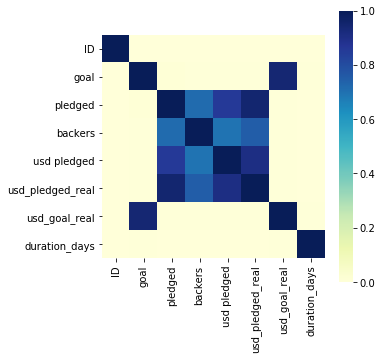

In [13]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(), square=True, cmap="YlGnBu")
plt.show()

## 3.6 - Data Distribution and plot

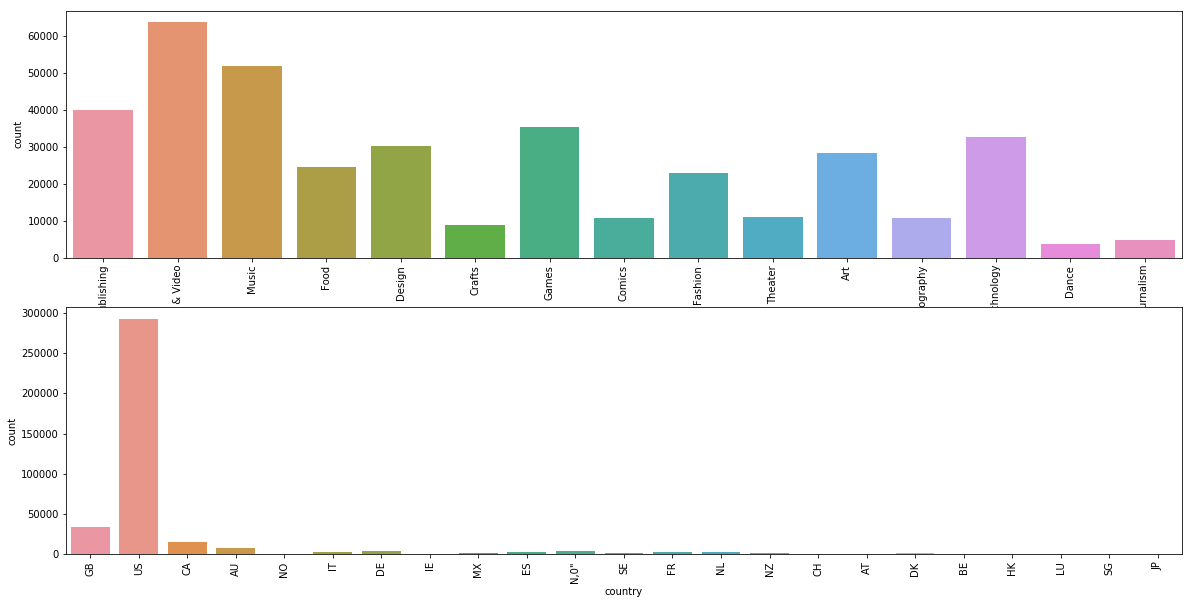

In [14]:
categorical = [
  'main_category', 'country'
]

fig, ax = plt.subplots(2, 1, figsize=(20, 10))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

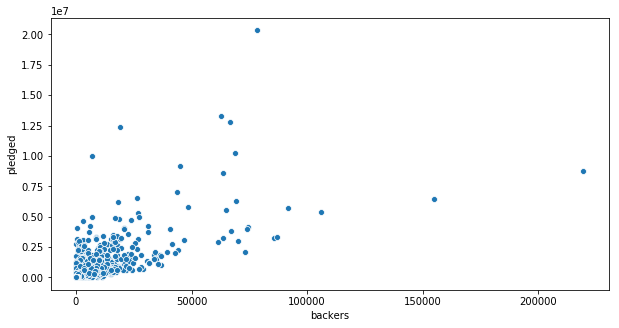

In [15]:
plt.subplots(1, 1, figsize=(10, 5))
sns.scatterplot(y=df['pledged'], x=df['backers'])

# 4 - Data Preparation

In [4]:
df = df[df["state"].isin(["failed","canceled","suspended","successful"])].copy() 
print("=======================================================")
print("Dataframe shape before Data Preparation : {}".format(df.shape))
print("=======================================================\n")

df = df.drop('ID', 1)
df = df.drop('name', 1)
df = df.drop('usd pledged', 1)
df = df.drop('usd_pledged_real', 1)
df = df.drop('backers', 1)

df['launched'] = pd.to_datetime(df['launched'])
df['deadline'] = pd.to_datetime(df['deadline'])
df['duration_days'] = df['deadline'].subtract(df['launched'])
df['duration_days'] = df['duration_days'].astype('timedelta64[D]')

df = df.drop('launched', 1)
df = df.drop('deadline', 1)
df = df.drop('pledged', 1)


df['state'] = df['state'].map({
        'failed': 0,
        'canceled': 0, 
        'suspended':0, 
        'successful': 1         
})

df = pd.get_dummies(df, columns = ['category'])
df = pd.get_dummies(df, columns = ['main_category'])
df = pd.get_dummies(df, columns = ['currency'])
df = pd.get_dummies(df, columns=['country'])

df.rename(columns={"main_category_Film & Video": "main_category_Film"}, inplace=True)


print("=======================================================")
print("Dataframe shape after Data Preparation : {}".format(df.shape))
print("=======================================================\n")

Dataframe shape before Data Preparation : (372300, 15)

Dataframe shape after Data Preparation : (372300, 215)



In [16]:
corr = df.corr()

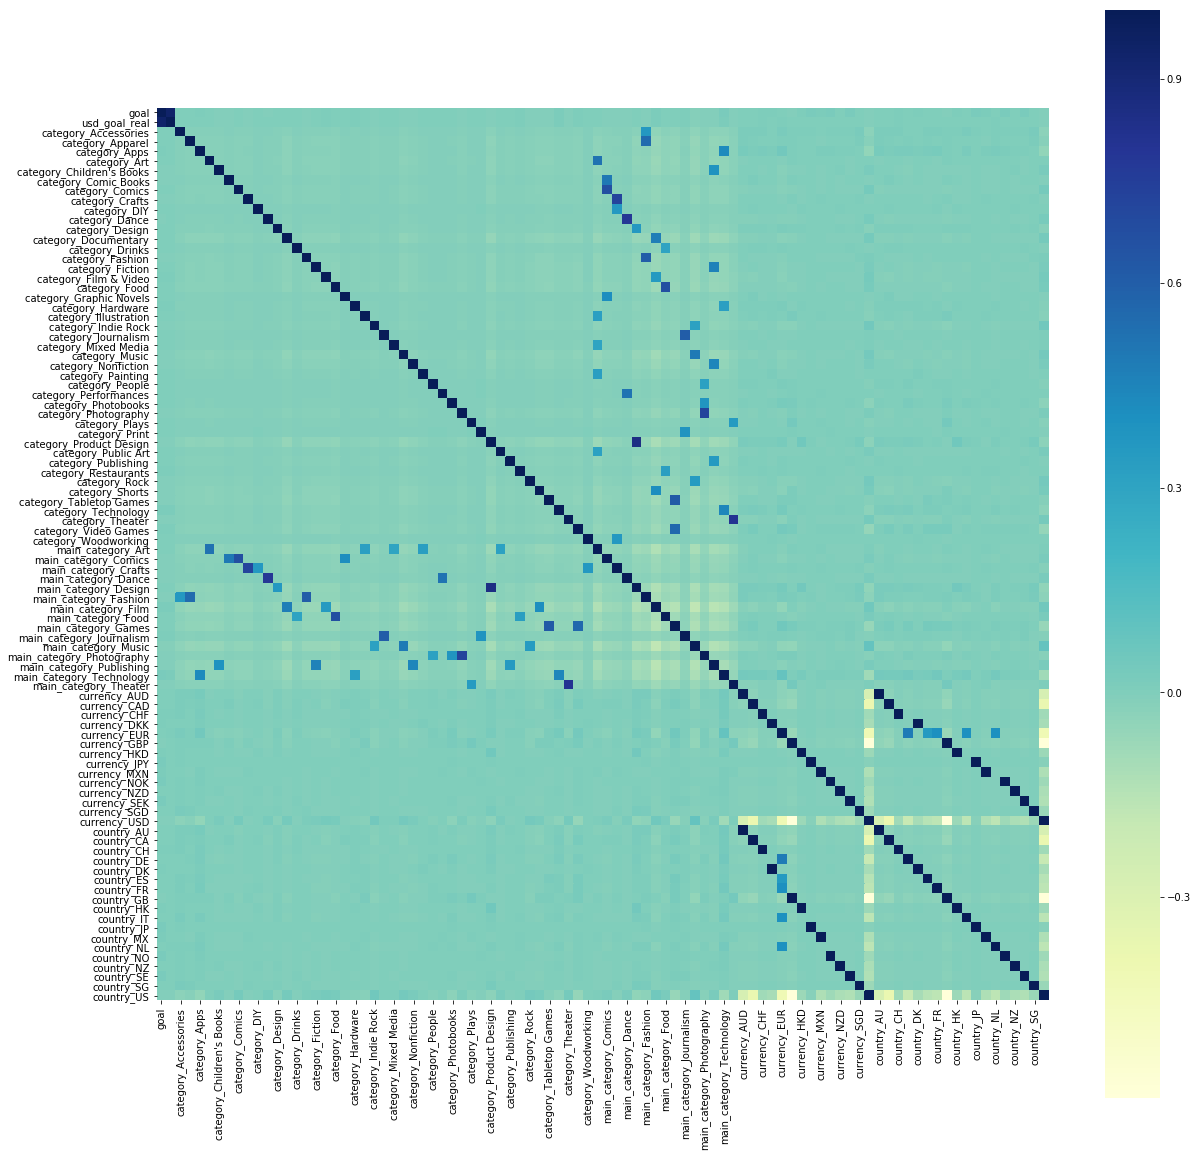

In [17]:
m = (corr.mask(np.eye(len(corr), dtype=bool)).abs() >= 0.30).any()
raw = corr.loc[m, m]
plt.figure(figsize=(20,20))
sns.heatmap(raw, square=True, cmap="YlGnBu")
plt.show()

In [13]:
target_names=df.state.unique()

y = df['state']

df = df.drop('state', 1)

X_train, X_test, Y_train, Y_test = train_test_split(df, y, test_size =0.5, random_state = 42)

print('train data shape')
print(X_train.shape, Y_train.shape)
print('\ntest data shape')
print(X_test.shape, Y_test.shape)

train data shape
(189330, 14) (189330,)

test data shape
(189331, 14) (189331,)


In [18]:
df.head()

,goal,usd_goal_real,duration_days,category_3D Printing,category_Academic,category_Accessories,category_Action,category_Animals,category_Animation,category_Anthologies,...,country_JP,country_LU,country_MX,"country_N,0""",country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
369272,5000.0,5000.0,29.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
371614,5000.0,5000.0,28.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11264,15000.0,15000.0,29.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
103634,15000.0,15000.0,59.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
88849,25000.0,25000.0,29.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# 5 - Model Selection

In [6]:
def train_and_test(classifier, X_train, X_test, y_train, y_test):
    
    
    pred = classifier.fit(X_train, y_train).predict(X_test)

    accuracy = accuracy_score(y_test, pred)

    roc_auc = roc_auc_score(y_test, pred)
    
    classification_rep = classification_report(y_test, pred)
    
    con_matrix = confusion_matrix(y_test, pred)
    tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
    specificity = tn / (tn+fp)
    sensitivity = tp / (tp+fn)

    fpr, tpr, _ = roc_curve(y_test, classifier.fit(X_train, y_train).predict_proba(X_test)[:,1])
    
    
    print("=======================================================")
    print("Scores")
    print("=======================================================\n")
    print ("accuracy  score: {} %".format(round(accuracy,3)))
    print ("auc  score: {} \n".format(round(roc_auc,3)))
    
    print("=======================================================")
    print("Errors")
    print("=======================================================\n")
    print("Mean Squared Error: "+str(round(mean_squared_error(y_test, pred),3)))
    print("R^2 Metric: "+str(round(r2_score(y_test, pred),3)))
    
    print("=======================================================")
    print("Classification Report")
    print("=======================================================\n")
    print(classification_rep)

    print("=======================================================")
    print("Area under Curve plot")
    print("=======================================================\n")
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
    print("=======================================================")
    print("Confusion Matrix")
    print("=======================================================\n")
    plt.figure(figsize=(12,12))
    plt.subplot(2,1,1)
    sns.heatmap(con_matrix, annot=True, fmt="d", xticklabels=target_names, yticklabels=target_names)
    plt.ylabel("Real value")
    plt.xlabel("Predicted value")
    plt.show()
    
    print("Sensitivity : {}".format(sensitivity))
    print("Specificity : {}".format(specificity))
    
    return accuracy

In [7]:
def try_models(classifier): 
    pipeline = make_pipeline(
        Imputer(strategy='mean'),
        RobustScaler(),
        classifier
    )
    model = pipeline
    acc = train_and_test(model, X_train, X_test, Y_train, Y_test)
    return acc

In [8]:
weight = class_weight.compute_class_weight('balanced' ,np.unique(Y_train),Y_train)
print(weight)

weight={0:weight[0],1:weight[1]}

[0.75528701 1.47928994]


## 5.1 - Adaboost

Scores

accuracy  score: 0.637 %
auc  score: 0.61 

Errors

Mean Squared Error: 0.363
R^2 Metric: -0.58
Classification Report

              precision    recall  f1-score   support

           0       0.72      0.71      0.71     16081
           1       0.49      0.52      0.50      8919

    accuracy                           0.64     25000
   macro avg       0.61      0.61      0.61     25000
weighted avg       0.64      0.64      0.64     25000

Area under Curve plot



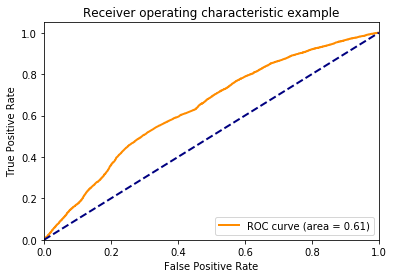

Confusion Matrix



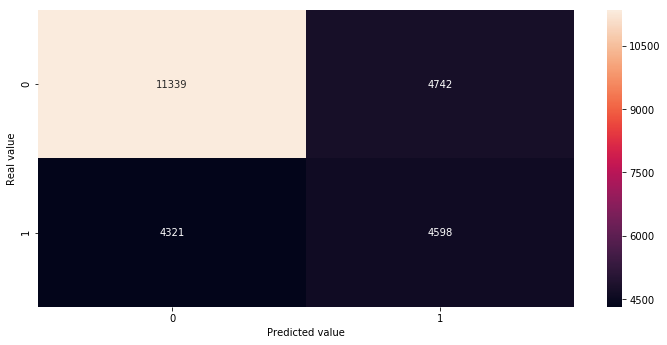

Sensitivity : 0.5155286467092723
Specificity : 0.7051178409302904


In [22]:
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=8,class_weight=weight),
                         algorithm='SAMME.R',
                         learning_rate=0.1,
                         n_estimators=400)


acc_ada =try_models(bdt)

## 5.2 - Logistic Regression

Scores

accuracy  score: 0.643 %
auc  score: 0.65 

Errors

Mean Squared Error: 0.357
R^2 Metric: -0.557
Classification Report

              precision    recall  f1-score   support

           0       0.78      0.63      0.69     16081
           1       0.50      0.67      0.57      8919

    accuracy                           0.64     25000
   macro avg       0.64      0.65      0.63     25000
weighted avg       0.68      0.64      0.65     25000

Area under Curve plot



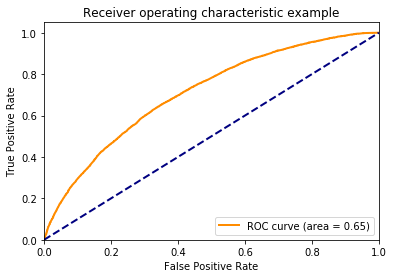

Confusion Matrix



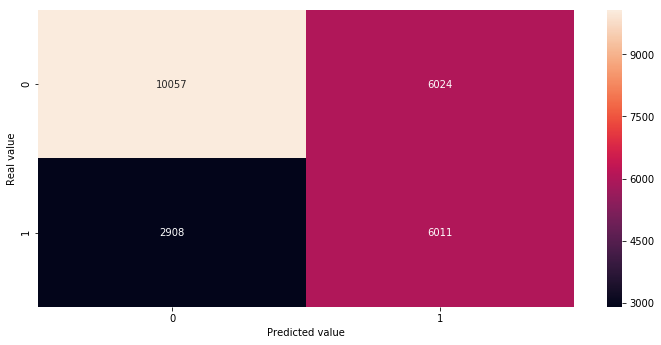

Sensitivity : 0.6739544792017043
Specificity : 0.6253964305702382


In [23]:
classifier=LogisticRegression(class_weight=weight,
                              penalty='l1',C=10)
acc_log = try_models(classifier)

## 5.3 - K-Nearest Neighbors

Scores

accuracy  score: 0.677 %
auc  score: 0.615 

Errors

Mean Squared Error: 0.323
R^2 Metric: -0.406
Classification Report

              precision    recall  f1-score   support

           0       0.71      0.83      0.77     16081
           1       0.57      0.40      0.47      8919

    accuracy                           0.68     25000
   macro avg       0.64      0.62      0.62     25000
weighted avg       0.66      0.68      0.66     25000

Area under Curve plot



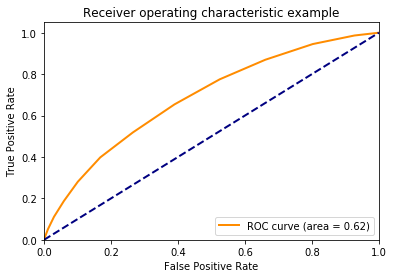

Confusion Matrix



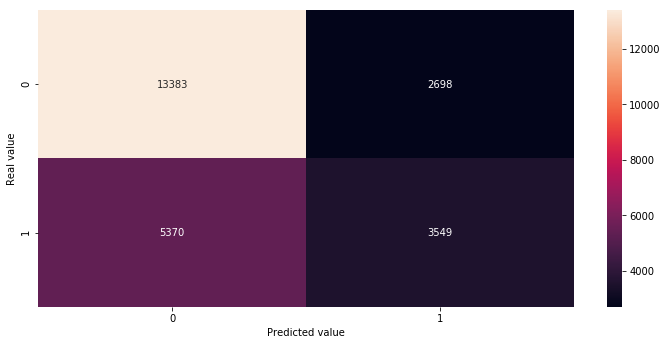

Sensitivity : 0.3979145644130508
Specificity : 0.832224364156458


In [24]:
knn = KNeighborsClassifier(n_neighbors=13,
                           algorithm='auto')

acc_knn = try_models(knn)

## 5.4 - Support Vector Machines (Linear)

Scores

accuracy  score: 0.624 %
auc  score: 0.637 

Errors

Mean Squared Error: 0.376
R^2 Metric: -0.609
Classification Report

              precision    recall  f1-score   support

           0       0.76      0.58      0.66      1567
           1       0.50      0.69      0.58       933

    accuracy                           0.62      2500
   macro avg       0.63      0.64      0.62      2500
weighted avg       0.66      0.62      0.63      2500

Area under Curve plot



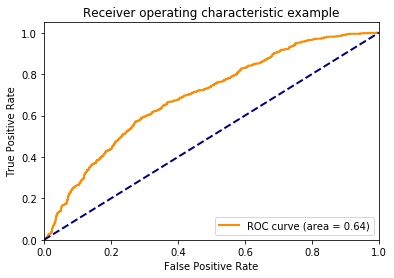

Confusion Matrix



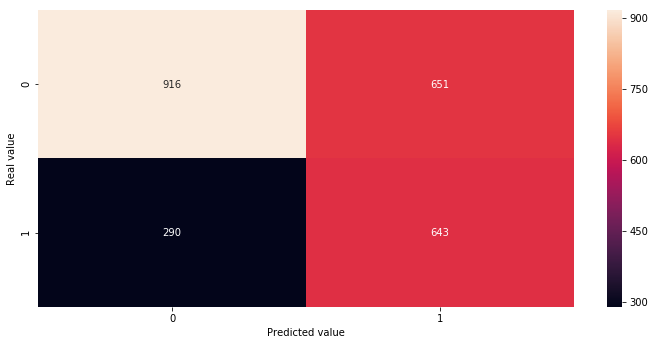

Sensitivity : 0.6891747052518756
Specificity : 0.5845564773452457


In [9]:
linear_svc = OneVsRestClassifier(SVC(class_weight=weight,
                                     kernel = 'linear',
                                     probability=True,
                                     C=20,
                                     gamma='auto')
                                 ,n_jobs=-1)

acc_svm = try_models(linear_svc)

## 5.5 - Support Vector Machines (Radial basis function)

Scores

accuracy  score: 0.633 %
auc  score: 0.644 

Errors

Mean Squared Error: 0.367
R^2 Metric: -0.57
Classification Report

              precision    recall  f1-score   support

           0       0.76      0.60      0.67      1567
           1       0.51      0.69      0.58       933

    accuracy                           0.63      2500
   macro avg       0.63      0.64      0.63      2500
weighted avg       0.67      0.63      0.64      2500

Area under Curve plot



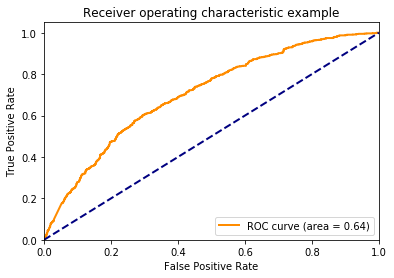

Confusion Matrix



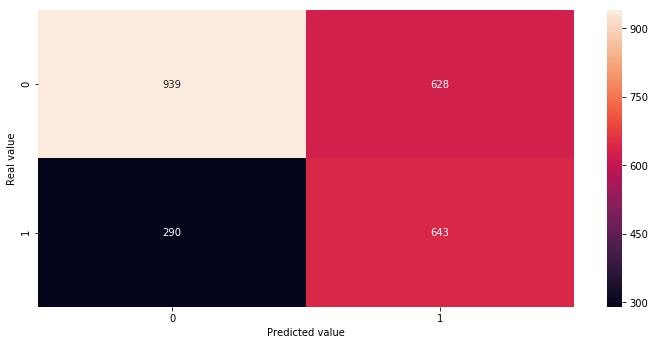

Sensitivity : 0.6891747052518756
Specificity : 0.599234205488194


In [10]:
svc = OneVsRestClassifier(SVC(class_weight=weight,
                                     kernel = 'rbf',
                                     probability=True,
                                     C=20,
                                     gamma='auto')
                                 ,n_jobs=-1)

acc_svm_rbf = try_models(svc)

### 5.5.1 - Support Vector Machines (Radial basis function) with PCA

Scores

accuracy  score: 0.529 %
auc  score: 0.577 

Errors

Mean Squared Error: 0.471
R^2 Metric: -1.044
Classification Report

              precision    recall  f1-score   support

           0       0.74      0.41      0.52     16010
           1       0.41      0.75      0.53      8990

    accuracy                           0.53     25000
   macro avg       0.58      0.58      0.53     25000
weighted avg       0.62      0.53      0.53     25000

Area under Curve plot



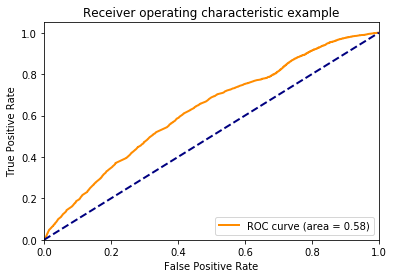

Confusion Matrix



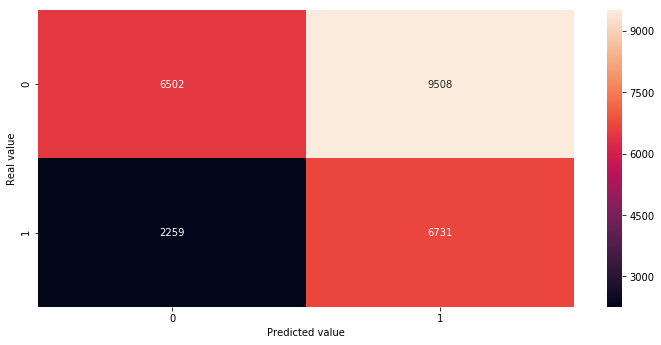

Sensitivity : 0.7487208008898777
Specificity : 0.4061211742660837


In [21]:
clf = make_pipeline( Imputer(strategy='mean'),
                        StandardScaler(),
                        OneVsRestClassifier(SVC( class_weight=weight,
                                                 kernel = 'rbf',
                                                 probability=True,
                                                 C=20,
                                                 gamma='auto')
                                             ,n_jobs=-1))

acc_svm_rbfpca = train_and_test(clf, Xpca_train, Xpca_test, Ypca_train, Ypca_test)

### 5.5.2 - Support Vector Machines (Linear) with PCA

Scores

accuracy  score: 0.524 %
auc  score: 0.577 

Errors

Mean Squared Error: 0.476
R^2 Metric: -1.068
Classification Report

              precision    recall  f1-score   support

           0       0.75      0.39      0.51     16010
           1       0.41      0.77      0.54      8990

    accuracy                           0.52     25000
   macro avg       0.58      0.58      0.52     25000
weighted avg       0.63      0.52      0.52     25000

Area under Curve plot



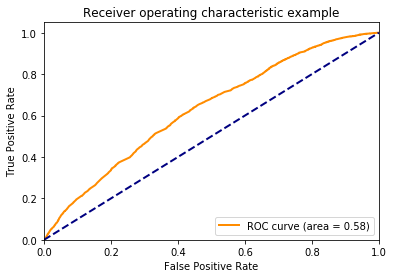

Confusion Matrix



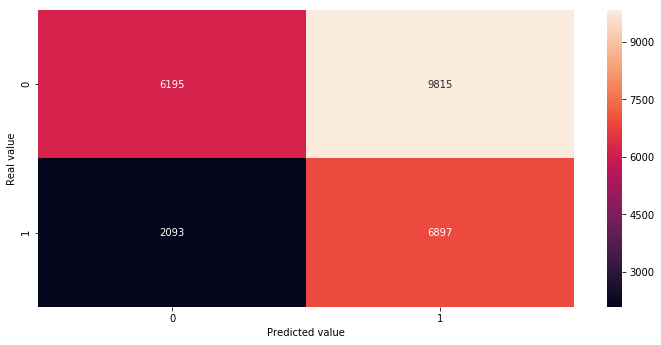

Sensitivity : 0.7671857619577308
Specificity : 0.38694565896314803


In [22]:
clf = make_pipeline( Imputer(strategy='mean'),
                        StandardScaler(),
                        OneVsRestClassifier(SVC( class_weight=weight,
                                                 kernel = 'linear',
                                                 probability=True,
                                                 C=20,
                                                 gamma='auto')
                                             ,n_jobs=-1))

acc_svm_linearpca = train_and_test(clf, Xpca_train, Xpca_test, Ypca_train, Ypca_test)

## 5.6 - Decision Tree

Scores

accuracy  score: 0.608 %
auc  score: 0.629 

Errors

Mean Squared Error: 0.392
R^2 Metric: -0.703
Classification Report

              precision    recall  f1-score   support

           0       0.77      0.55      0.64     16010
           1       0.47      0.70      0.56      8990

    accuracy                           0.61     25000
   macro avg       0.62      0.63      0.60     25000
weighted avg       0.66      0.61      0.62     25000

Area under Curve plot



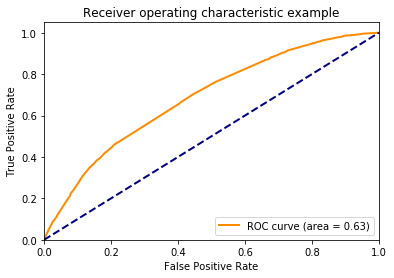

Confusion Matrix



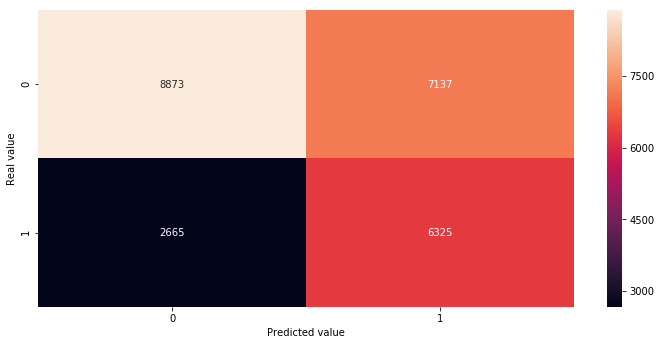

Sensitivity : 0.703559510567297
Specificity : 0.5542161149281699


In [10]:
decision_tree = DecisionTreeClassifier(class_weight=weight,
                                       max_depth = 10,
                                       min_samples_leaf = 17,
                                       min_samples_split = 2)

acc_dt = try_models(decision_tree)

## 5.7 - Random Forest

Scores

accuracy  score: 0.653 %
auc  score: 0.656 

Errors

Mean Squared Error: 0.347
R^2 Metric: -0.509
Classification Report

              precision    recall  f1-score   support

           0       0.77      0.64      0.70     16010
           1       0.51      0.67      0.58      8990

    accuracy                           0.65     25000
   macro avg       0.64      0.66      0.64     25000
weighted avg       0.68      0.65      0.66     25000

Area under Curve plot



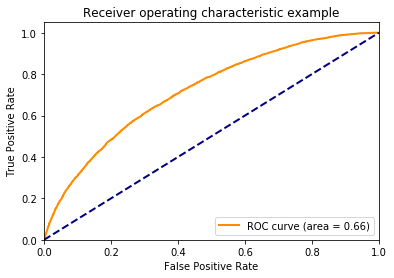

Confusion Matrix



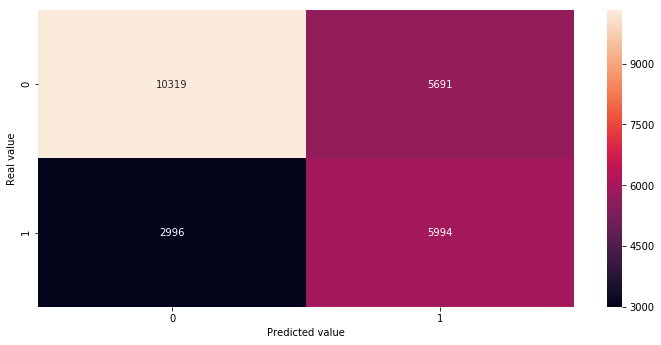

Sensitivity : 0.6667408231368187
Specificity : 0.6445346658338539


In [11]:
random_forest = RandomForestClassifier(n_estimators=100,
                                       class_weight=weight,
                                       max_depth= 30,
                                       max_features= 8,
                                       min_samples_leaf= 2,
                                       min_samples_split= 35)


acc_rf = try_models(random_forest)

## 5.8 - Gradient Boosting

Scores

accuracy  score: 0.673 %
auc  score: 0.566 

Errors

Mean Squared Error: 0.327
R^2 Metric: -0.419
Classification Report

              precision    recall  f1-score   support

           0       0.67      0.95      0.79     16010
           1       0.66      0.19      0.29      8990

    accuracy                           0.67     25000
   macro avg       0.67      0.57      0.54     25000
weighted avg       0.67      0.67      0.61     25000

Area under Curve plot



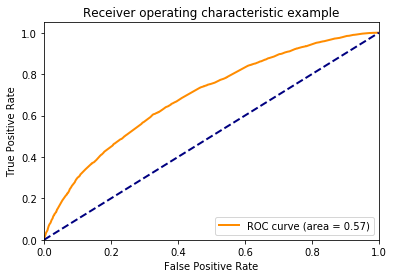

Confusion Matrix



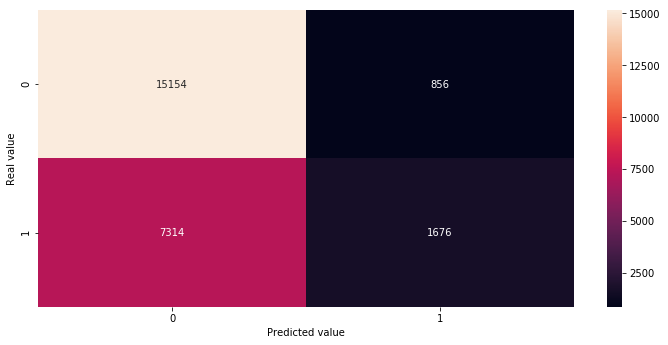

Sensitivity : 0.1864293659621802
Specificity : 0.9465334166146159


In [12]:
clf_gb = make_pipeline( Imputer(strategy='mean'),
                        StandardScaler(),
                        GradientBoostingClassifier(n_estimators=100, 
                                                   max_depth=1, 
                                                   random_state=0))

acc_gb = train_and_test(clf_gb, X_train, X_test, Y_train, Y_test)

## 5.9 - Multi-layer perceptron

Scores

accuracy  score: 0.686 %
auc  score: 0.626 

Errors

Mean Squared Error: 0.314
R^2 Metric: -0.365
Classification Report

              precision    recall  f1-score   support

           0       0.72      0.84      0.77     16010
           1       0.59      0.41      0.49      8990

    accuracy                           0.69     25000
   macro avg       0.65      0.63      0.63     25000
weighted avg       0.67      0.69      0.67     25000

Area under Curve plot



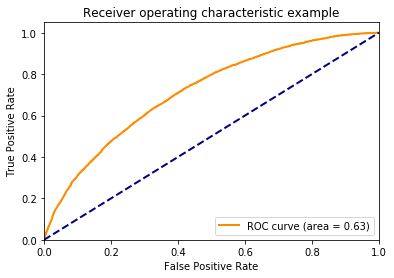

Confusion Matrix



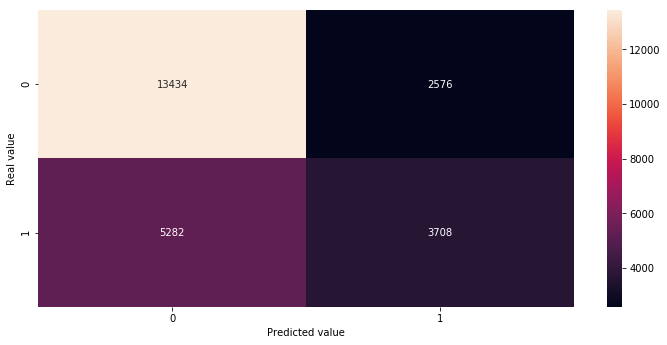

Sensitivity : 0.4124582869855395
Specificity : 0.8391005621486571


In [13]:
mlp = MLPClassifier(activation= 'relu',
                    alpha= 0.05,
                    hidden_layer_sizes= (50, 100, 50),
                    learning_rate= 'constant',
                    solver= 'sgd')


acc_mlp = try_models(mlp)

## 5.10 - Bagging Classifier

Scores

accuracy  score: 0.664 %
auc  score: 0.607 

Errors

Mean Squared Error: 0.336
R^2 Metric: -0.459
Classification Report

              precision    recall  f1-score   support

           0       0.71      0.81      0.76     16010
           1       0.54      0.40      0.46      8990

    accuracy                           0.66     25000
   macro avg       0.63      0.61      0.61     25000
weighted avg       0.65      0.66      0.65     25000

Area under Curve plot



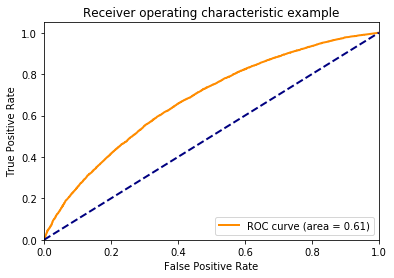

Confusion Matrix



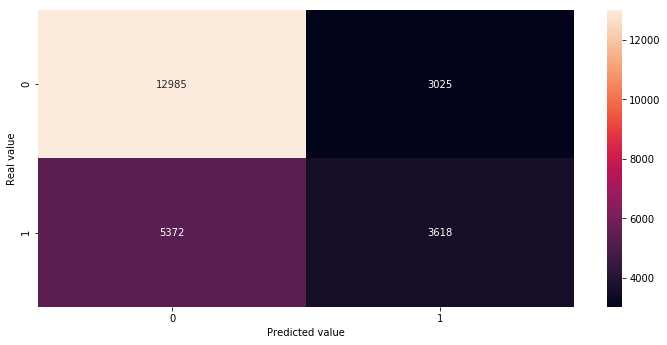

Sensitivity : 0.4024471635150167
Specificity : 0.81105559025609


In [14]:
bagging = BaggingClassifier(
    KNeighborsClassifier(
        n_neighbors=8,
        weights='distance'),
    oob_score=True,
    max_samples=0.5,
    max_features=1.0)

acc_bc = try_models(bagging)

# 6 - Principal Component Analysis (PCA)

## 6.1 - PCA

In [15]:
print('DataFrame shape:')
print(df.shape)

sel = VarianceThreshold(threshold=(.8 * (1 - .8)))

dfpca = pd.DataFrame(sel.fit_transform(df))

pca = PCA(n_components = 5)
principalComponents = pca.fit_transform(dfpca)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1','pc2','pc3','pc4','pc5'])

Xpca_train, Xpca_test, Ypca_train, Ypca_test = train_test_split(
    principalDf,
    y, 
    test_size = 0.5,
    random_state=42
)

print('PCA reduces the number of variables to:')
print(Xpca_train.shape, Ypca_train.shape)
print(Xpca_test.shape, Ypca_test.shape)

DataFrame shape:
(50000, 214)
PCA reduces the number of variables to:
(25000, 5) (25000,)
(25000, 5) (25000,)


## 6.2 - Bagging classsifier with PCA

Scores

accuracy  score: 0.643 %
auc  score: 0.574 

Errors

Mean Squared Error: 0.357
R^2 Metric: -0.55
Classification Report

              precision    recall  f1-score   support

           0       0.69      0.82      0.75     16010
           1       0.51      0.33      0.40      8990

    accuracy                           0.64     25000
   macro avg       0.60      0.57      0.57     25000
weighted avg       0.62      0.64      0.62     25000

Area under Curve plot



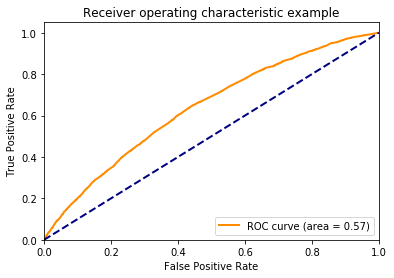

Confusion Matrix



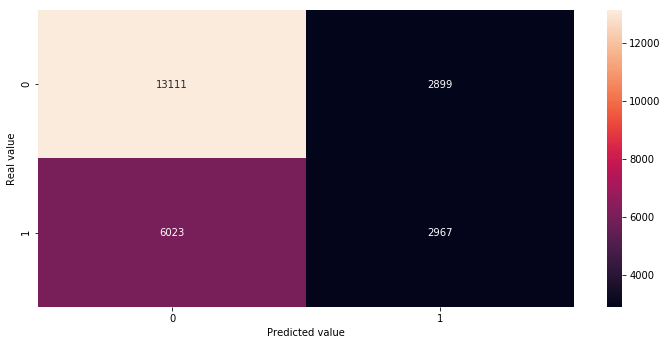

Sensitivity : 0.3300333704115684
Specificity : 0.8189256714553405


In [18]:
clf = make_pipeline( Imputer(strategy='mean'),
                        StandardScaler(),
                        BaggingClassifier(
                                            KNeighborsClassifier(
                                                n_neighbors=8,
                                                weights='distance'),
                                            oob_score=True,
                                            max_samples=0.5,
                                            max_features=1.0))

acc_pca = train_and_test(clf, Xpca_train, Xpca_test, Ypca_train, Ypca_test)

# 7 -  Model Evaluation

In [3]:
models = pd.DataFrame({
    'Model': ['KNN', 
              'Logistic Regression', 
              'Random Forest',   
              'Linear Support Vector Machine',
              'Radial Kernel SVM'
              'Decision Tree', 
              'BaggingClassifier',
              'AdaBoostClassifier', 
              'GradientBoostingClassifier',
              'Bagging PCA',
              'Multilayer Perceptron',
              'Linear Support Vector Machine with PCA',
              'Radial Kernel SVM with PCA'
             ],
    'Score': [acc_knn, 
              acc_log, 
              acc_svm,
              acc_svm_rbf,
              acc_dt,
              acc_bc, 
              acc_ada, 
              acc_gb, 
              acc_pca,
              acc_mlp,
              acc_svm_linearpca,
              acc_svm_rbfpca
             ]})
models.sort_values(by='Score', ascending=False)

,Model,Score
9,Multilayer Perceptron,68.6
0,KNN,67.7
7,GradientBoostingClassifier,67.3
5,BaggingClassifier,66.4
1,Logistic Regression,64.3
8,Bagging PCA,64.3
6,AdaBoostClassifier,63.7
3,Linear Support Vector Machine,63.3
2,Random Forest,62.4
4,Radial Kernel SVMDecision Tree,60.8
